Problem Definition

The goal of this project is to predict flight ticket prices based on various features such as airline, source and destination cities, travel class, days left before departure, and more.
We'll use a regression model to estimate the price and explore factors that influence flight costs.

Dataset Description

The dataset was scraped from EaseMyTrip over a 50-day period and contains over 300,000 domestic flight records in India.
It includes features such as airline, source/destination cities, stops, class, duration, and days left until departure.

The target variable is the flight ticket price, making this a regression problem with potential for valuable insights and accurate predictions.

In [ ]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('hls')

# Download the dataset
path = kagglehub.dataset_download("shubhambathwal/flight-price-prediction")

# Build full path to the CSV
csv_path = os.path.join(path, "Clean_Dataset.csv")

# Load dataset into a DataFrame
df = pd.read_csv(csv_path)

# Quick check
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Pre-processing

In [ ]:
# Define categorical columns based on actual column names
categorical_cols = [
    'airline', 'flight', 'source_city', 'departure_time',
    'stops', 'arrival_time', 'destination_city', 'class'
]

# Strip whitespace from categorical columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.str.strip())

# Ensure all categorical columns are strings
df[categorical_cols] = df[categorical_cols].astype(str)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop missing values
df = df.dropna()

# Reset index
df = df.reset_index(drop=True)

# Confirm types
print("Data types:\n", df.dtypes)


Missing values:
 Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
Data types:
 Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


Data Visualisation

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 13

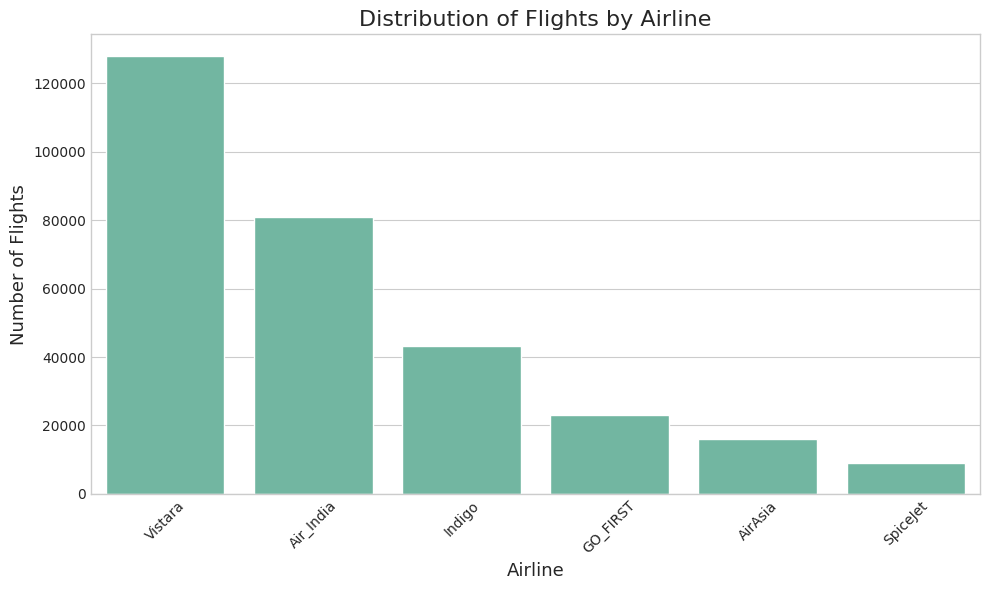

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='airline', order=df['airline'].value_counts().index)
plt.title('Distribution of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

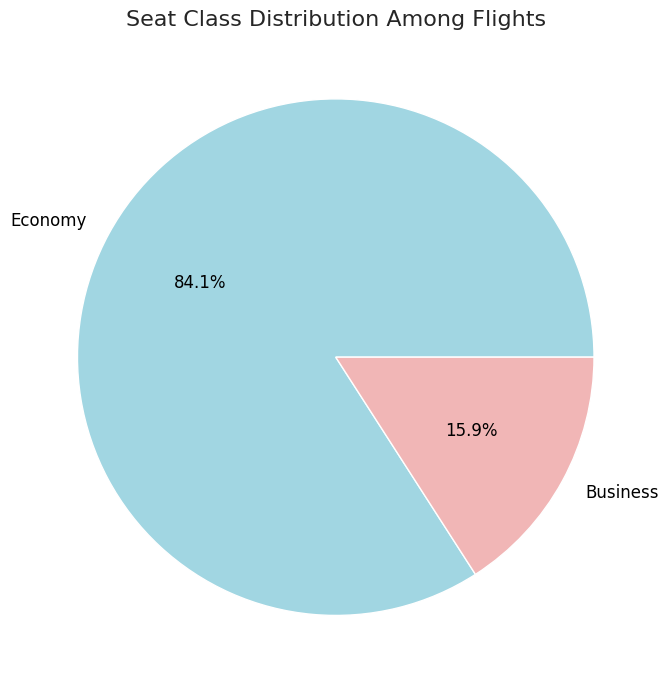

In [ ]:
df_class = df.groupby(['flight', 'airline', 'class'], as_index=False).count()
plt.figure(figsize=(7, 7))
df_class['class'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    colors=['#A1D6E2', '#F1B6B6'],
    labels=['Economy', 'Business'],
    textprops={'fontsize': 12, 'color': 'black'}
)
plt.title('Seat Class Distribution Among Flights')
plt.ylabel('')
plt.tight_layout()
plt.show()

/tmp/ipython-input-22-3403644355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='airline', y='price', palette='Set3')


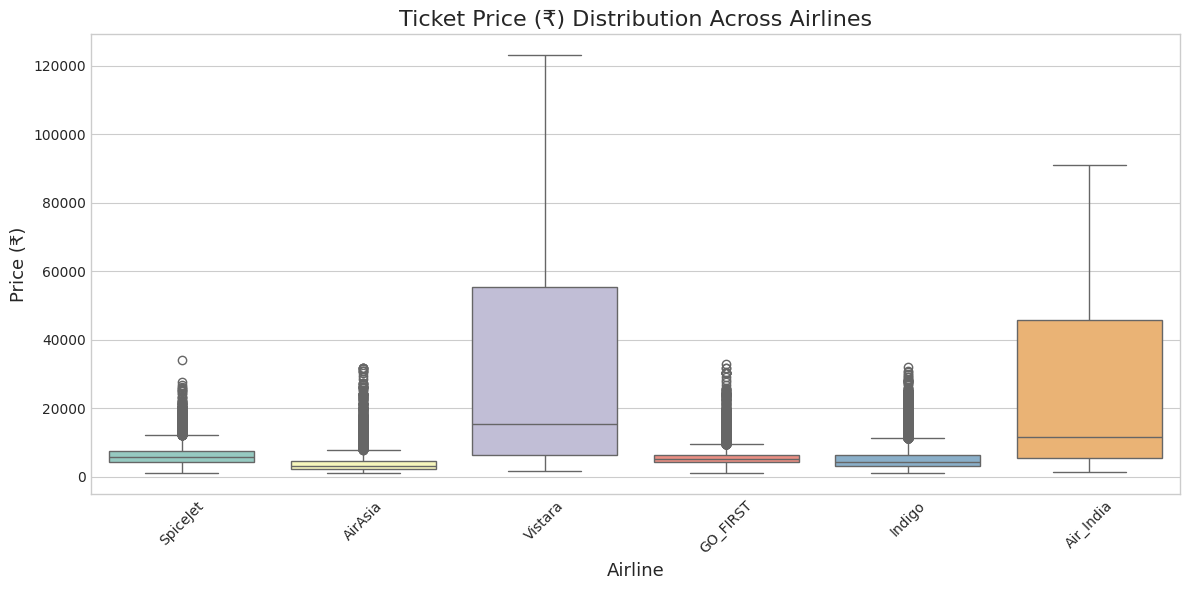

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='airline', y='price', palette='Set3')
plt.title('Ticket Price (₹) Distribution Across Airlines')
plt.xlabel('Airline')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-23-3639739907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stops', y='price', palette='coolwarm')


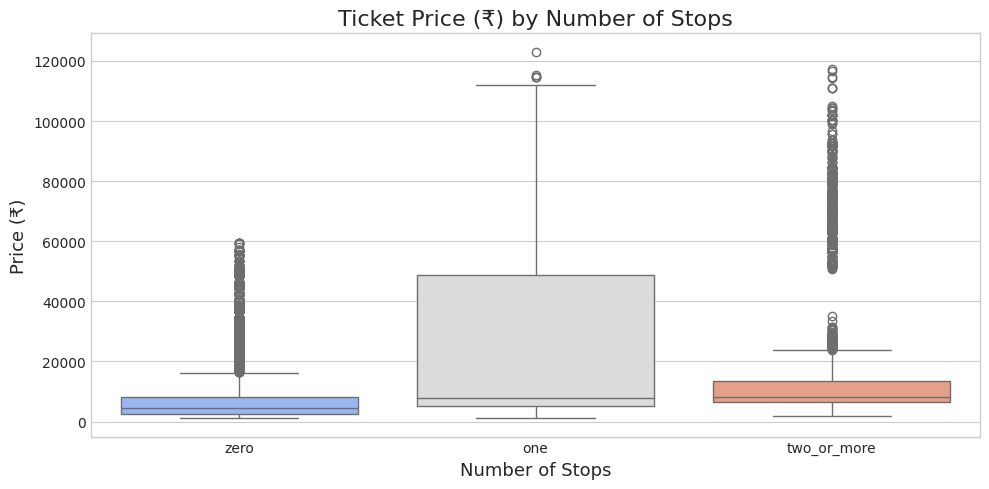

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='stops', y='price', palette='coolwarm')
plt.title('Ticket Price (₹) by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-24-1840919935.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='departure_time', y='price', palette='viridis')
/tmp/ipython-input-24-1840919935.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='arrival_time', y='price', palette='magma')


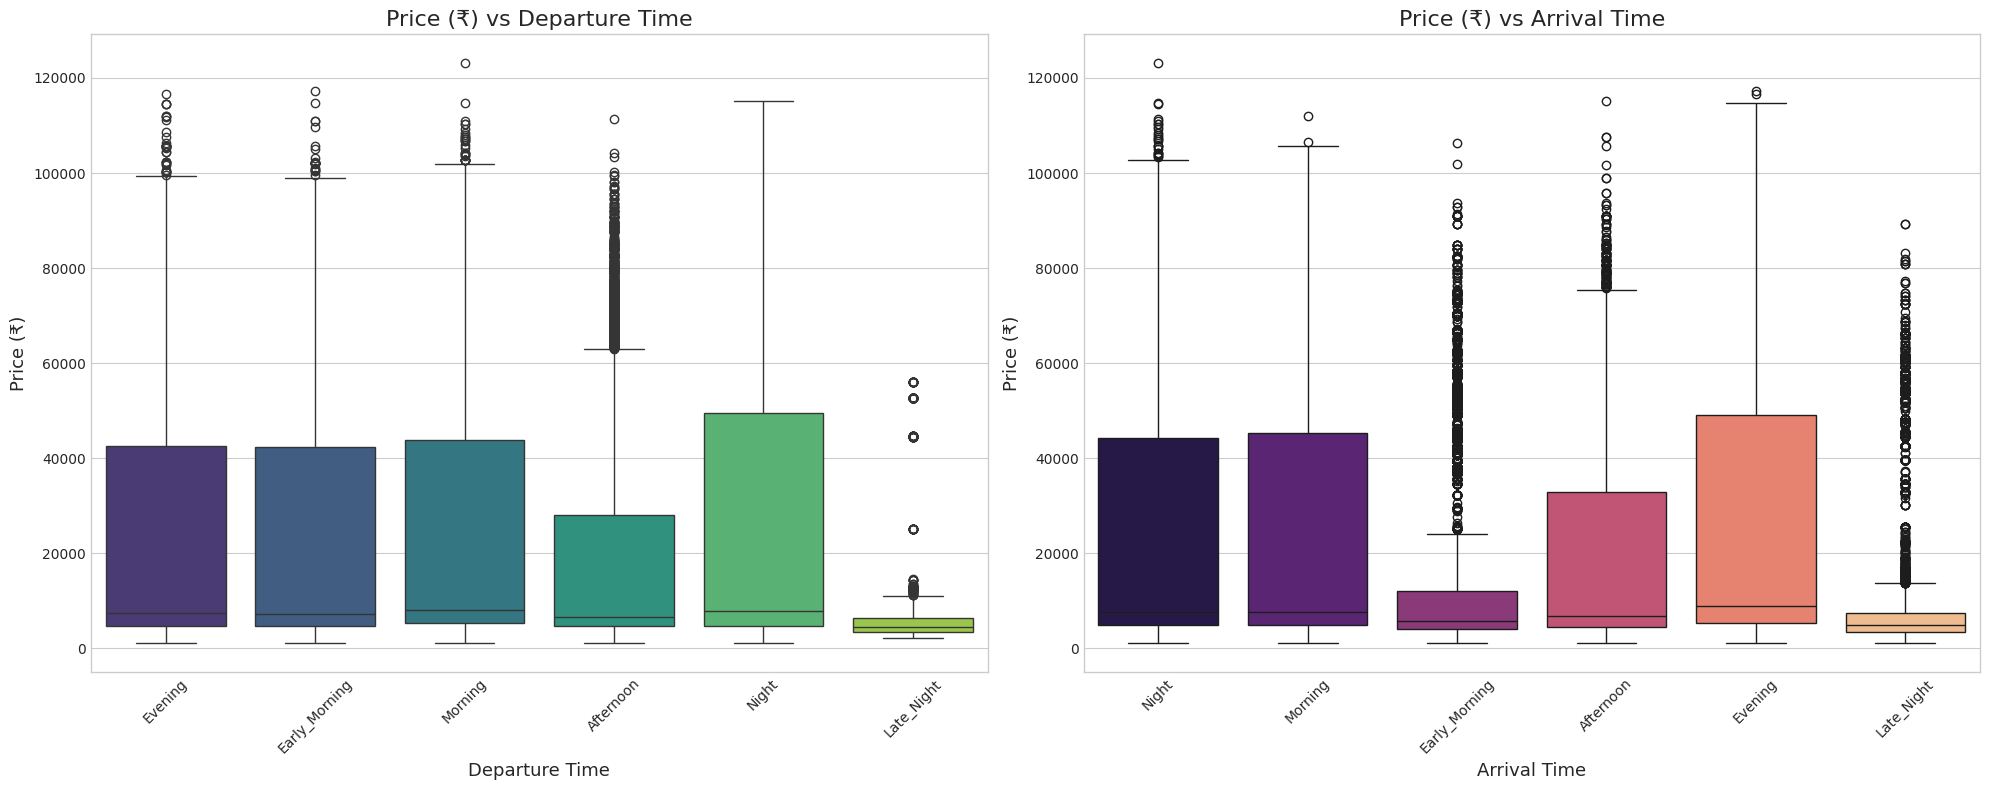

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='departure_time', y='price', palette='viridis')
plt.title('Price (₹) vs Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='arrival_time', y='price', palette='magma')
plt.title('Price (₹) vs Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-25-2575545294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='source_city', y='price', palette='Spectral')
/tmp/ipython-input-25-2575545294.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='destination_city', y='price', palette='coolwarm')


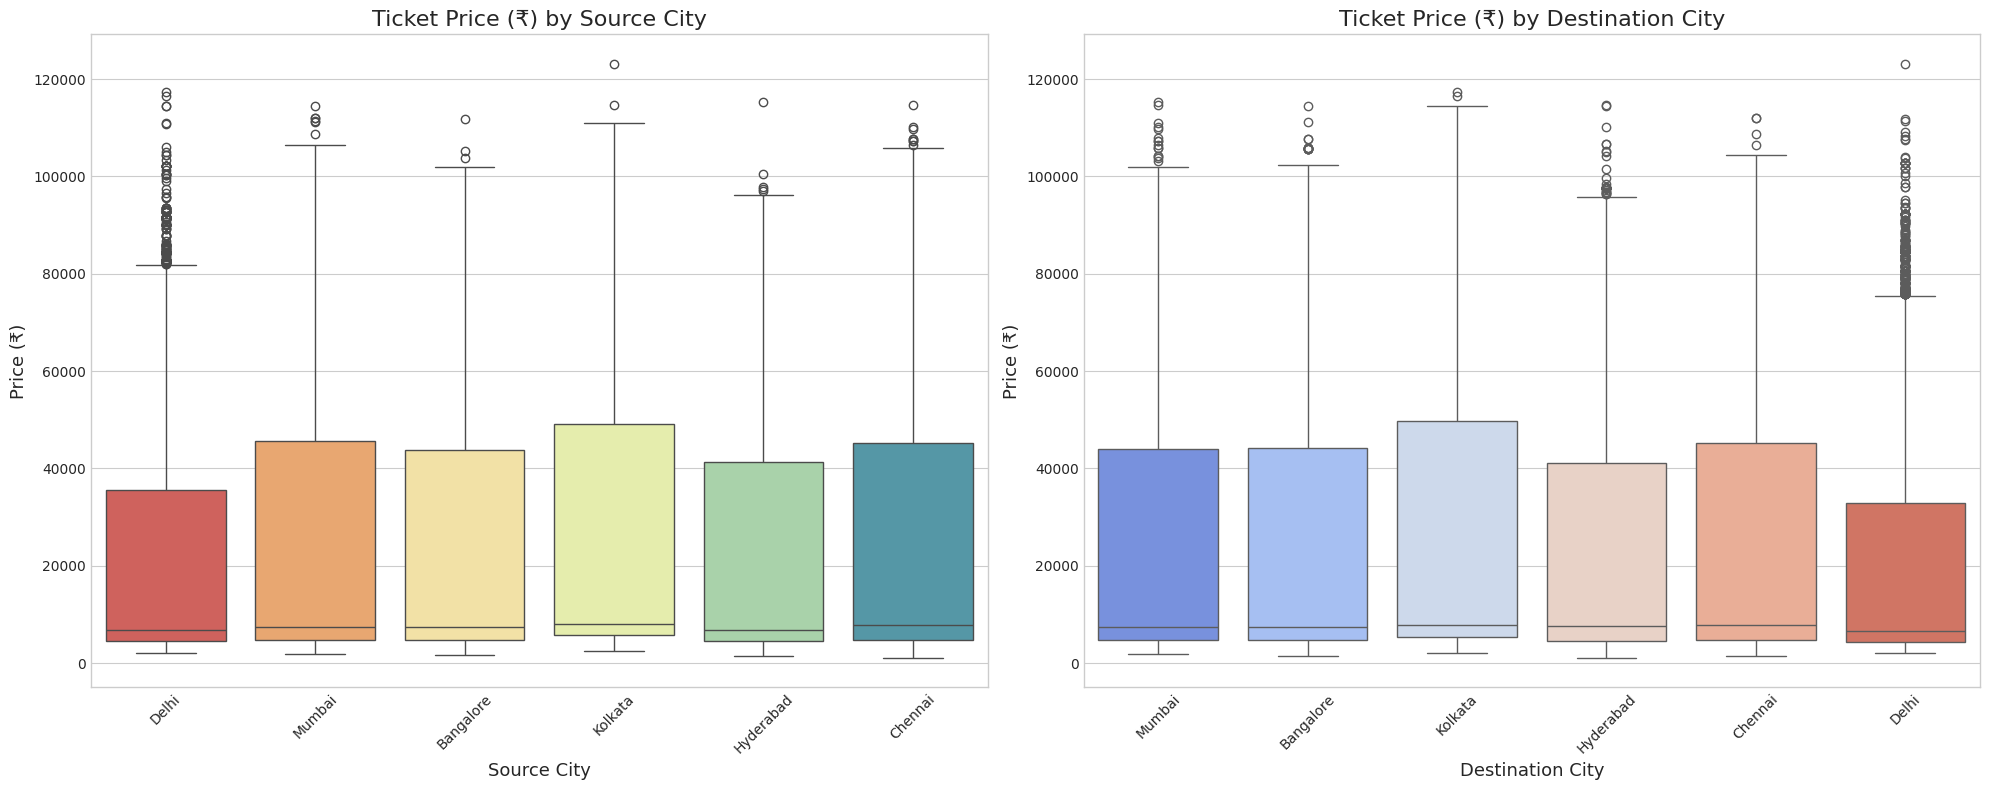

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='source_city', y='price', palette='Spectral')
plt.title('Ticket Price (₹) by Source City')
plt.xlabel('Source City')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='destination_city', y='price', palette='coolwarm')
plt.title('Ticket Price (₹) by Destination City')
plt.xlabel('Destination City')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

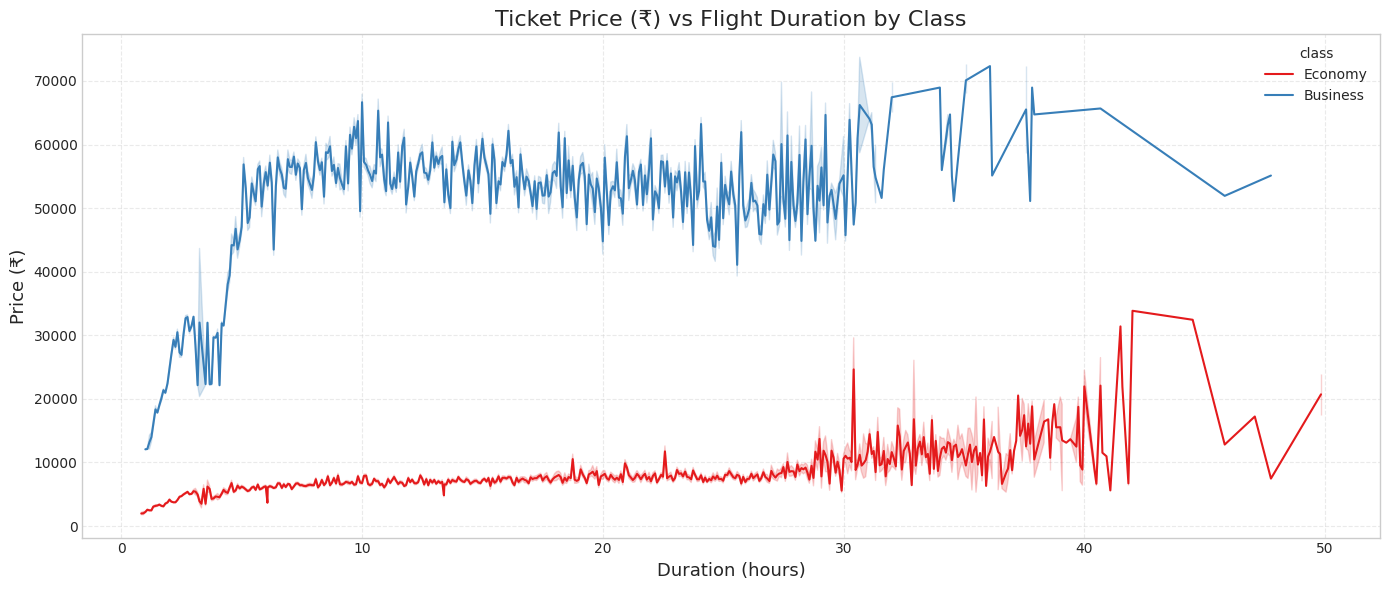

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='duration', y='price', hue='class', palette='Set1')
plt.title('Ticket Price (₹) vs Flight Duration by Class')
plt.xlabel('Duration (hours)')
plt.ylabel('Price (₹)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

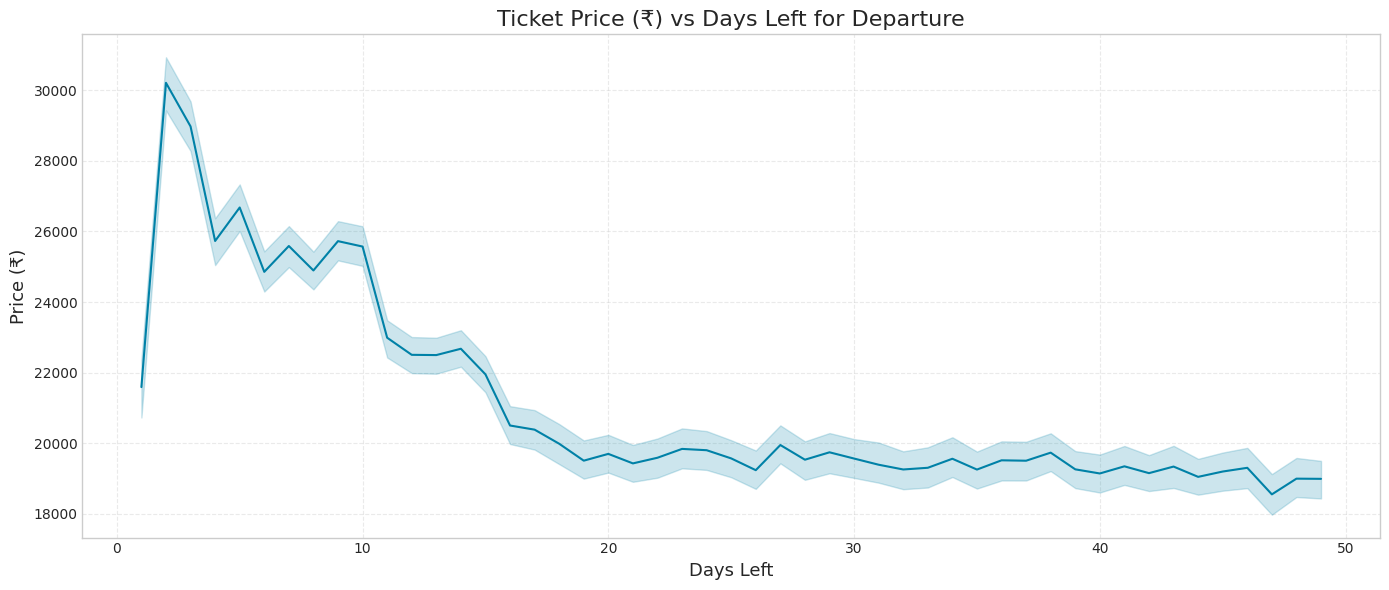

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='days_left', y='price', color='#0081A7')
plt.title('Ticket Price (₹) vs Days Left for Departure')
plt.xlabel('Days Left')
plt.ylabel('Price (₹)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

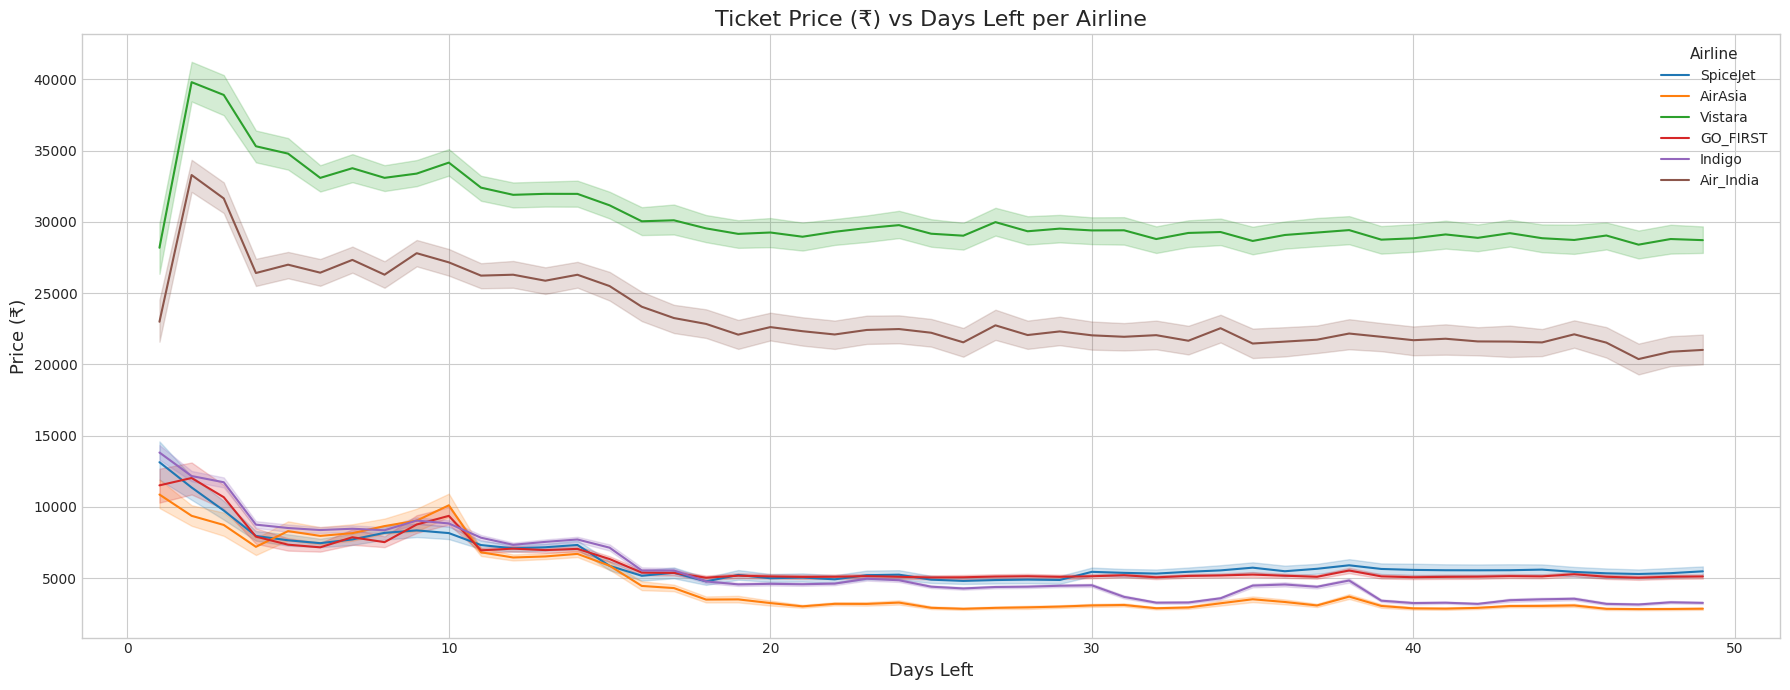

In [ ]:
plt.figure(figsize=(18, 7))
sns.lineplot(data=df, x='days_left', y='price', hue='airline', palette='tab10')
plt.title('Ticket Price (₹) vs Days Left per Airline')
plt.xlabel('Days Left')
plt.ylabel('Price (₹)')
plt.legend(title='Airline', title_fontsize=11, fontsize=10)
plt.tight_layout()
plt.show()

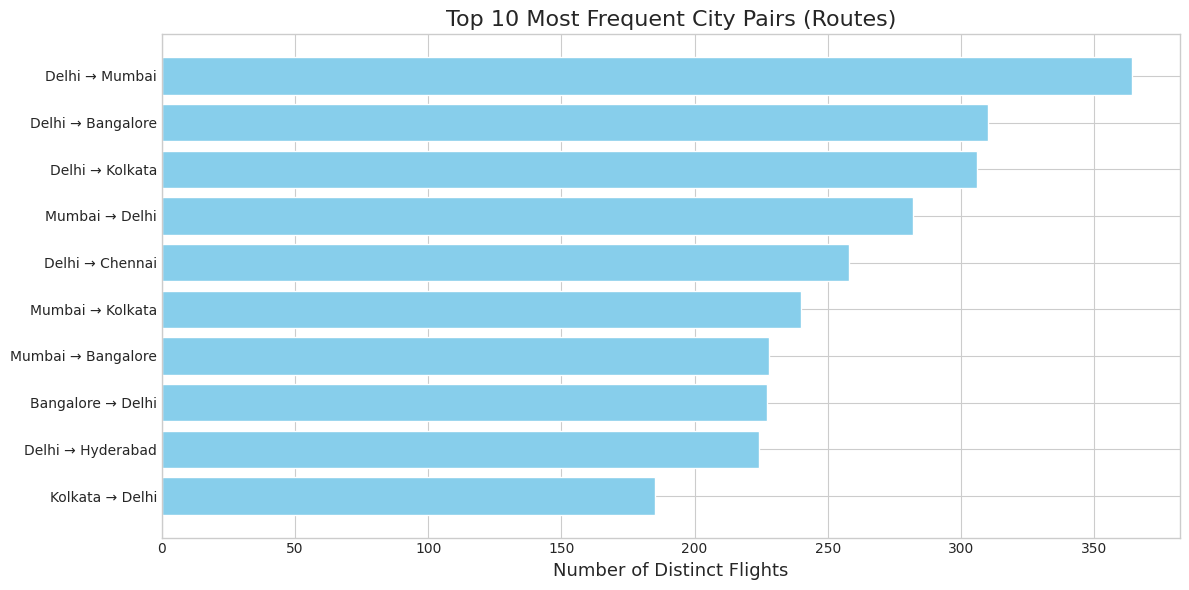

In [ ]:
flight_counts = df.groupby(['flight', 'source_city', 'destination_city', 'airline', 'class'], as_index=False).count()
city_pairs = flight_counts.groupby(['source_city', 'destination_city'], as_index=False)['flight'].count()
top_routes = city_pairs.sort_values(by='flight', ascending=False).head(10)
top_routes['route'] = top_routes['source_city'] + ' \u2192 ' + top_routes['destination_city']

plt.figure(figsize=(12, 6))
plt.barh(top_routes['route'], top_routes['flight'], color='skyblue')
plt.xlabel('Number of Distinct Flights')
plt.title('Top 10 Most Frequent City Pairs (Routes)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


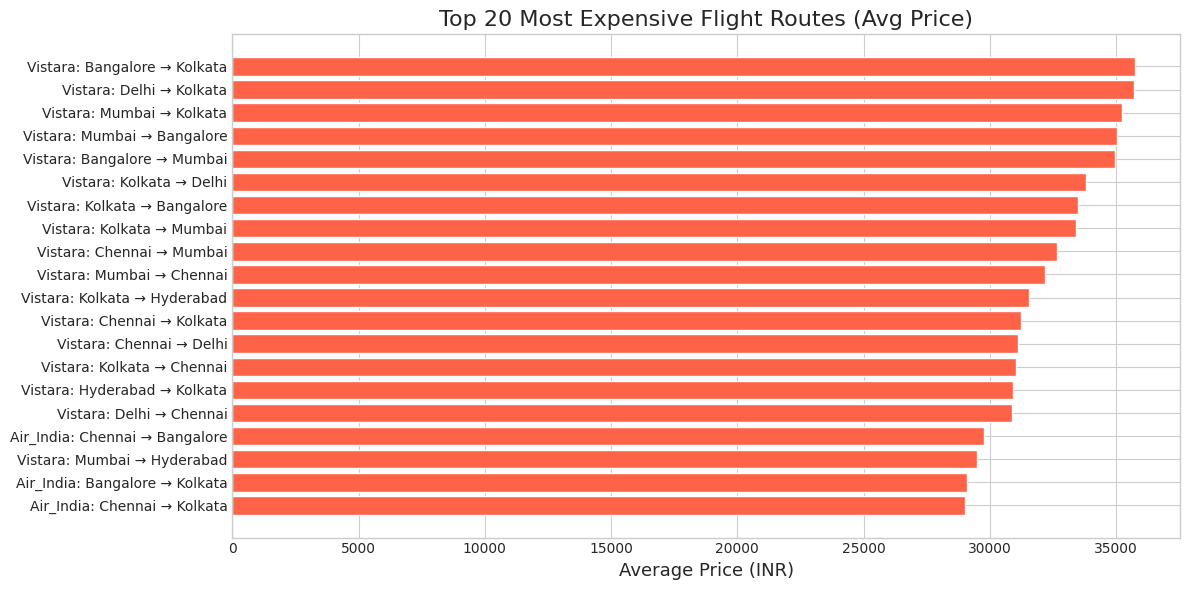

In [ ]:
# 1. Compute the average price by airline, source, and destination city
avg_price = df.groupby(['airline', 'source_city', 'destination_city'], as_index=False)['price'].mean()

# 2. Sort by average price in descending order and take top 20 routes
top_avg_price = avg_price.sort_values(by='price', ascending=False).head(20)

# 3. Create a readable label for each route to display on the chart
top_avg_price['route'] = (
    top_avg_price['airline'] + ': ' +
    top_avg_price['source_city'] + ' → ' +
    top_avg_price['destination_city']
)

# 4. Plot a horizontal bar chart of the top 20 most expensive routes
plt.figure(figsize=(12, 6))
plt.barh(top_avg_price['route'], top_avg_price['price'], color='tomato')
plt.xlabel('Average Price (INR)')
plt.title('Top 20 Most Expensive Flight Routes (Avg Price)')
plt.gca().invert_yaxis()  # Puts the most expensive route at the top
plt.tight_layout()
plt.show()


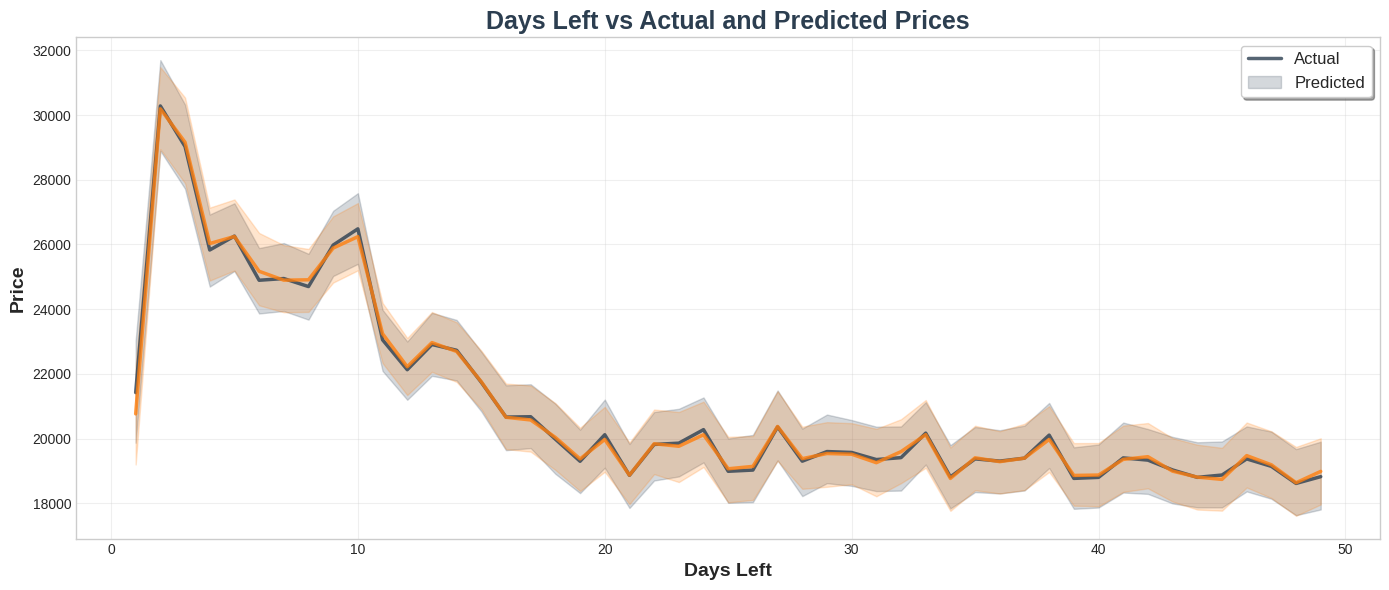

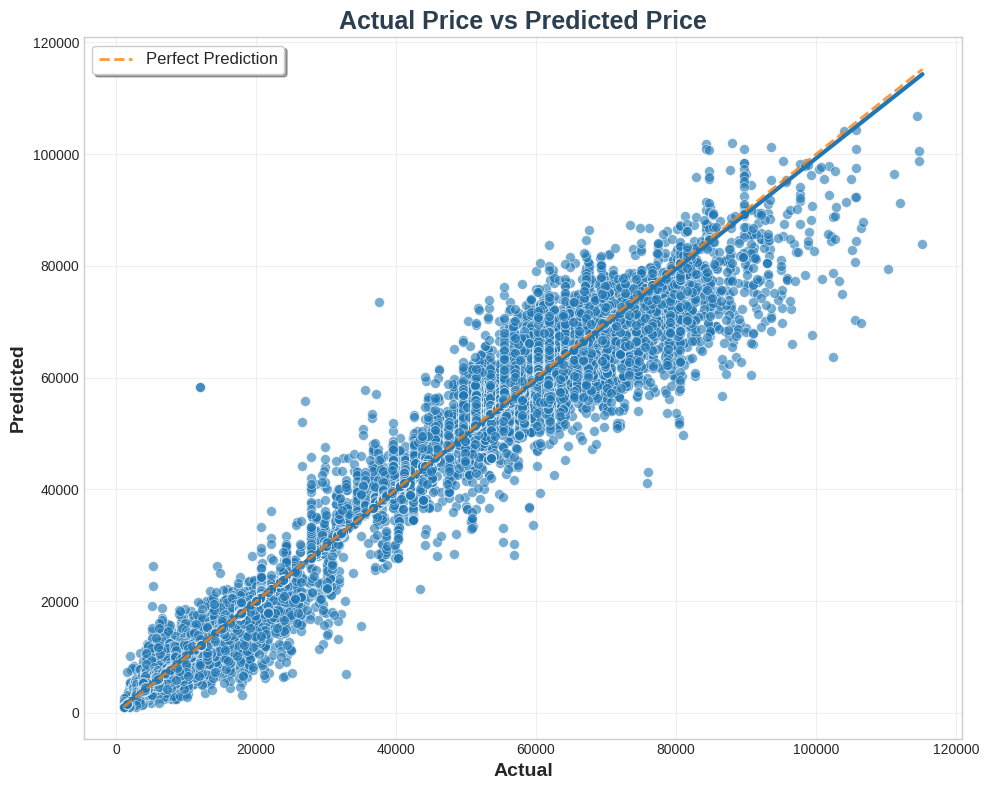


MODEL PERFORMANCE METRICS


,Model,MAE,RMSE,MAPE,R2,Adj_R2
0,Random Forest,804.99,2192.93,5.40,0.9907,0.9907
1,Extra Trees,830.76,2313.55,5.55,0.9896,0.9896
2,Linear Regression,4623.77,7003.56,43.67,0.9047,0.9047


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and font for ₹ symbol support
plt.style.use('default')
from matplotlib import rcParams
rcParams['font.family'] = 'DejaVu Sans'

# Custom color palette
colors = {
    'primary': '#1f77b4',
    'secondary': '#ff7f0e',
    'accent': '#2ca02c',
    'dark': '#2c3e50',
    'light': '#ecf0f1'
}

# Backup original dataframe
df_bk = df.copy()

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features with MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42)
}

# Evaluation function with concise explanations
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)  # Avg absolute error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Penalizes large errors
    r2 = r2_score(y_test, y_pred)  # Variance explained
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # % avg error

    # Adjusted R² corrects R² for feature count
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    return {
        'Model': name,
        'MAE': round(mae, 2),        # Lower is better
        'RMSE': round(rmse, 2),      # Lower is better
        'MAPE': round(mape, 2),      # Lower is better, in %
        'R2': round(r2, 4),          # Closer to 1 is better
        'Adj_R2': round(adj_r2, 4)   # Better for feature-rich models
    }

# Run evaluation for each model
results = []
for name, model in models.items():
    results.append(evaluate_model(name, model, X_train, X_test, y_train, y_test))

# Results dataframe sorted by Adjusted R²
results_df = pd.DataFrame(results).sort_values(by='Adj_R2', ascending=False).reset_index(drop=True)

# Use best model for predictions
best_model = models['Random Forest']
y_pred = best_model.predict(X_test)

# Join predictions with original data
result = pd.DataFrame({
    'Price_actual': y_test,
    'Price_pred': y_pred
}, index=y_test.index)
result = df_bk.join(result)

# Plot 1: Days left vs actual & predicted price
plt.figure(figsize=(14,6))
plt.style.use('seaborn-v0_8-whitegrid')

sns.lineplot(data=result, x='days_left', y='Price_actual',
             color=colors['dark'], linewidth=2.5, alpha=0.8)
sns.lineplot(data=result, x='days_left', y='Price_pred',
             color=colors['secondary'], linewidth=2.5, alpha=0.8)

plt.title('Days Left vs Actual and Predicted Prices',
          fontsize=18, fontweight='bold', color=colors['dark'])
plt.xlabel('Days Left', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=14, fontweight='bold')
plt.legend(['Actual', 'Predicted'], fontsize=12, frameon=True,
           fancybox=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Actual vs predicted price (scatter + regression)
plt.figure(figsize=(10,8))
plt.style.use('seaborn-v0_8-whitegrid')

plt.scatter(result['Price_actual'], result['Price_pred'],
           color=colors['primary'], alpha=0.6, s=50, edgecolor='white', linewidth=0.5)

# Regression fit line
sns.regplot(x='Price_actual', y='Price_pred', data=result,
           color=colors['primary'], scatter=False, line_kws={'linewidth': 3})

# Reference line y = x
min_val = min(result['Price_actual'].min(), result['Price_pred'].min())
max_val = max(result['Price_actual'].max(), result['Price_pred'].max())
plt.plot([min_val, max_val], [min_val, max_val],
         color=colors['secondary'], linestyle='--', linewidth=2, alpha=0.8,
         label='Perfect Prediction')

plt.title('Actual Price vs Predicted Price',
          fontsize=18, fontweight='bold', color=colors['dark'])
plt.xlabel('Actual', fontsize=14, fontweight='bold')
plt.ylabel('Predicted', fontsize=14, fontweight='bold')
plt.legend(fontsize=12, frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Final display: performance metrics
print("\n" + "="*60)
print("MODEL PERFORMANCE METRICS")
print("="*60)
results_df
